# Preprocessing

In [312]:
!pip install missingno

In [313]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [314]:
# Importing the data

data = pd.read_csv('weatherAUS.csv')
# data.info()

In [315]:
# Dropping the RainTomorrow column

data.drop(['RainTomorrow'], axis = 1, inplace = True)
# data.info()

In [316]:
# Checking if the data with some samples.

data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2


In [317]:
# Counting the null values

data.isnull().sum()

Date                  0
Location              0
MinTemp            3546
MaxTemp            3359
Rainfall           6362
Evaporation      115864
Sunshine         124978
WindGustDir       16330
WindGustSpeed     16223
WindDir9am        17040
WindDir3pm         9238
WindSpeed9am       4160
WindSpeed3pm       7731
Humidity9am        4849
Humidity3pm        8931
Pressure9am       24024
Pressure3pm       24005
Cloud9am          93670
Cloud3pm          99480
Temp9am            3624
Temp3pm            7783
RainToday          6362
RISK_MM            6361
dtype: int64

<AxesSubplot:>

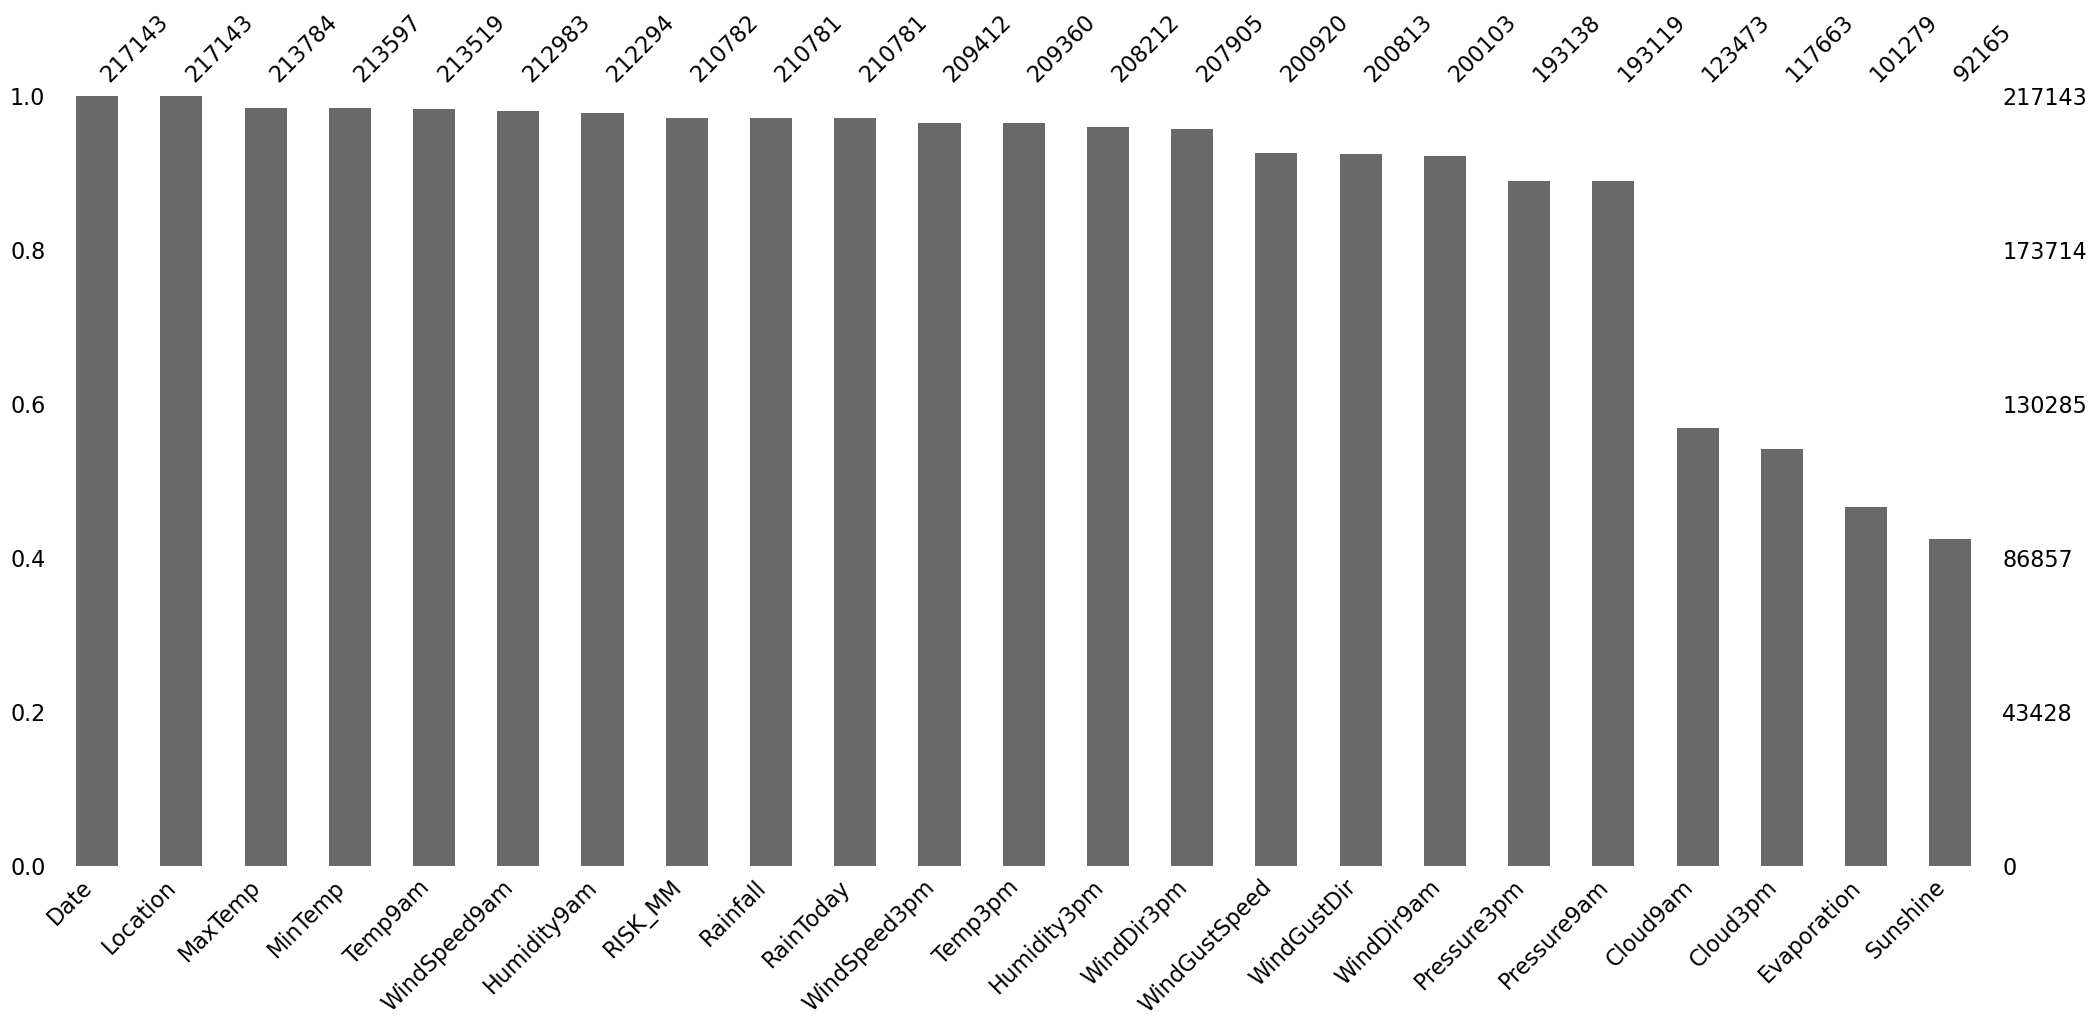

In [318]:
# Non-null values

mn.bar(data, labels = True, sort = 'descending')

In [319]:
# Checking for duplicacies

data.duplicated().sum()

0

In [320]:
# Dropping the records with Null values of Target Variable

data = data[data['RISK_MM'].notna()]

In [321]:
# data.info()

In [322]:
# Seperating the numerical and categorical columns

cat_cols = data.select_dtypes('object').columns.tolist()
num_cols = data.select_dtypes(include=np.number).columns.tolist()

In [323]:
cat_cols

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [324]:
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM']

<AxesSubplot:>

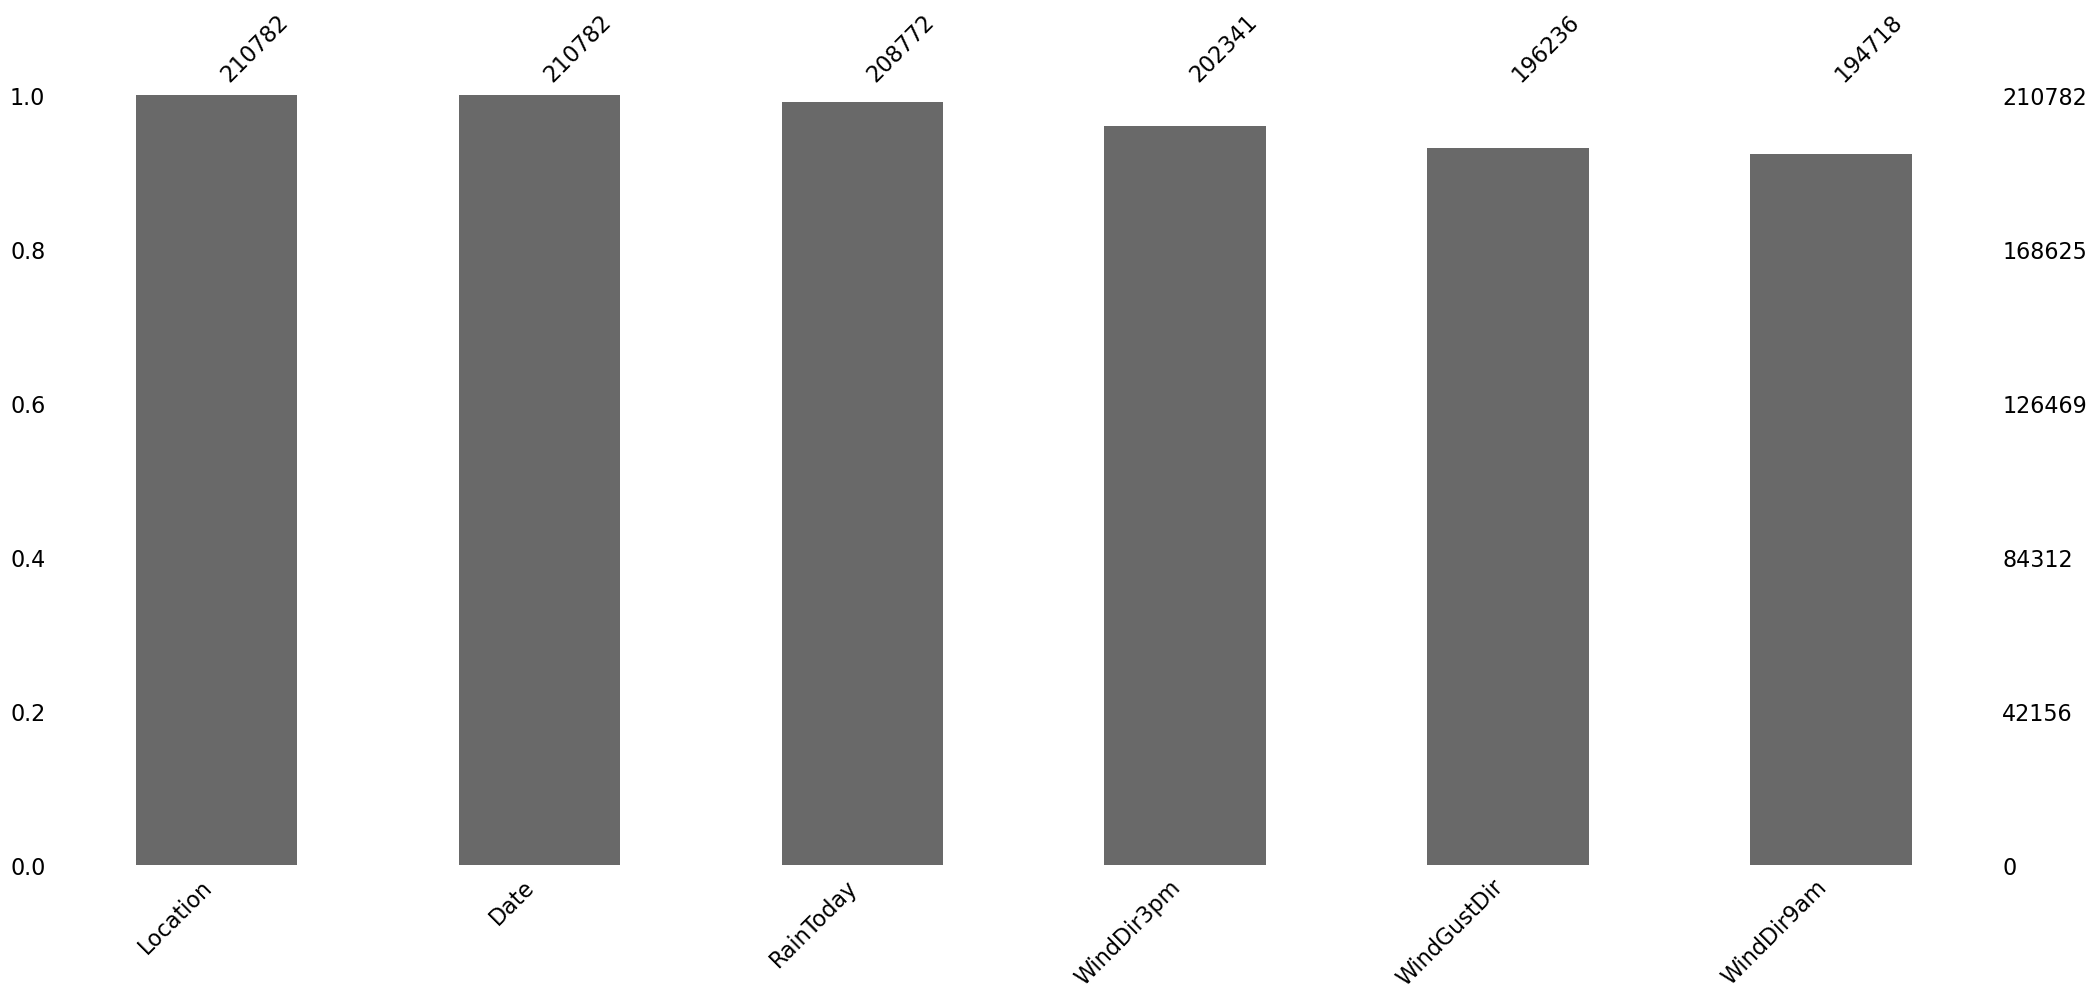

In [325]:
# Non-null values

mn.bar(data[cat_cols], labels = True, sort = 'descending')

<AxesSubplot:>

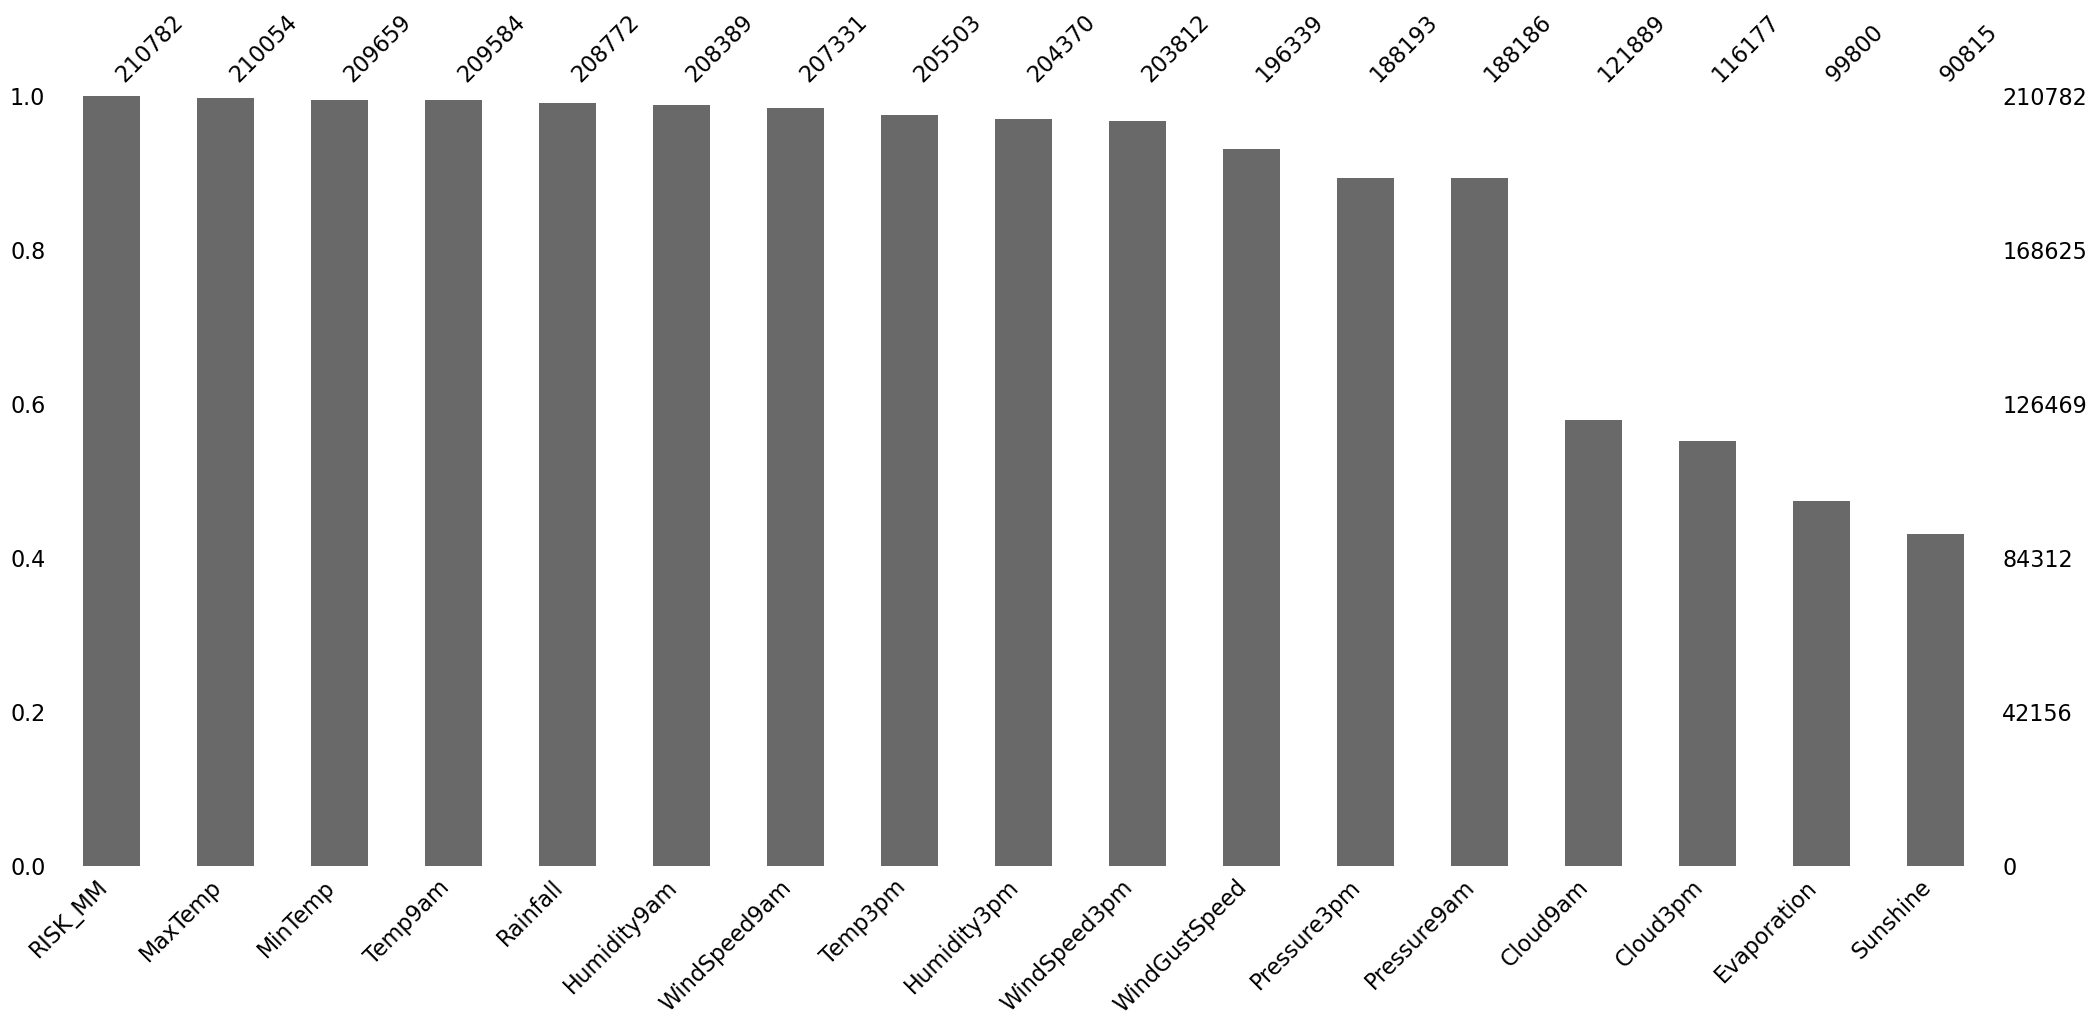

In [326]:
# Non-null values

mn.bar(data[num_cols], labels = True, sort = 'descending')

In [327]:
data[cat_cols].isnull().sum()

Date               0
Location           0
WindGustDir    14546
WindDir9am     16064
WindDir3pm      8441
RainToday       2010
dtype: int64

In [328]:
data[num_cols].isnull().sum()

MinTemp            1123
MaxTemp             728
Rainfall           2010
Evaporation      110982
Sunshine         119967
WindGustSpeed     14443
WindSpeed9am       3451
WindSpeed3pm       6970
Humidity9am        2393
Humidity3pm        6412
Pressure9am       22596
Pressure3pm       22589
Cloud9am          88893
Cloud3pm          94605
Temp9am            1198
Temp3pm            5279
RISK_MM               0
dtype: int64

In [329]:
cat1 = [var for var in cat_cols if data[var].isnull().sum()!=0]
cat1

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [330]:
for var in cat_cols:
    
    print(var, len(data[var].unique()))

Date 4929
Location 49
WindGustDir 17
WindDir9am 17
WindDir3pm 17
RainToday 3


In [331]:
num1 = [var for var in num_cols if data[var].isnull().sum()!=0]
num1

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [332]:
# Convert date from object to date

data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [333]:
data.drop('Date', axis=1, inplace = True)

In [334]:
data.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [335]:
data.Location.value_counts()

Canberra            4910
Sydney              4820
Darwin              4685
Perth               4675
Hobart              4665
Brisbane            4594
Launceston          4520
Townsville          4517
AliceSprings        4511
Bendigo             4509
MelbourneAirport    4502
PerthAirport        4501
MountGambier        4501
Ballarat            4501
Albury              4497
SydneyAirport       4497
Sale                4484
Watsonia            4483
Cobar               4482
Tuggeranong         4482
Nuriootpa           4471
Albany              4469
Mildura             4466
Woomera             4466
Portland            4458
Penrith             4448
CoffsHarbour        4444
Richmond            4443
GoldCoast           4428
NorfolkIsland       4420
NorahHead           4406
Wollongong          4399
BadgerysCreek       4394
Dartmoor            4383
SalmonGums          4381
Cairns              4348
Moree               4322
WaggaWagga          4224
Walpole             4208
MountGinini         4198


In [336]:
# Encoding location with dummy variables

pd.get_dummies(data.Location, drop_first=True)

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217138,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
217139,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
217140,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
217141,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [337]:
data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [338]:
data.WindGustDir.value_counts()

W      14470
SE     13585
S      13233
E      13226
SSW    13170
WSW    13149
N      13058
SSE    13004
SW     12881
WNW    11899
ENE    11895
NW     11673
ESE    10934
NE     10577
NNW     9776
NNE     9706
Name: WindGustDir, dtype: int64

In [339]:
pd.get_dummies(data.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [340]:
data['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [341]:
data['WindDir9am'].value_counts()

N      16463
SE     13477
E      13451
SSE    13306
S      12485
SW     12261
NW     12221
W      11975
NNE    11811
ESE    11488
ENE    11435
NNW    11348
SSW    11172
NE     11030
WNW    10834
WSW     9961
Name: WindDir9am, dtype: int64

In [342]:
pd.get_dummies(data.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [343]:
data['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [344]:
data['WindDir3pm'].value_counts()

SE     15207
W      14499
S      13967
WSW    13793
SW     13175
SSE    13149
WNW    12829
N      12607
NW     12275
ESE    12269
NE     12120
SSW    12102
E      11900
ENE    11414
NNW    11242
NNE     9793
Name: WindDir3pm, dtype: int64

In [345]:
pd.get_dummies(data.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [346]:
pd.get_dummies(data.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


Text(0, 0.5, 'WindSpeed3pm')

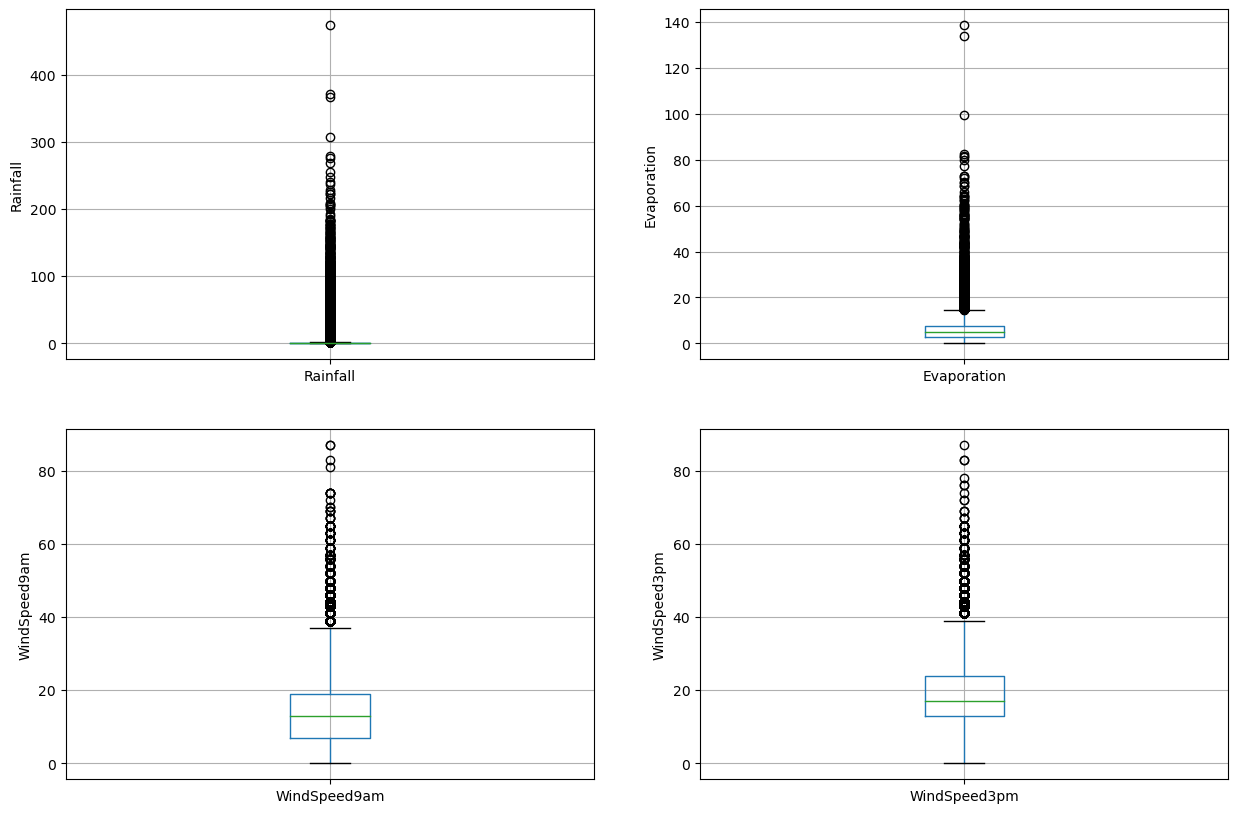

In [347]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = data.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 2, 4)
fig = data.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

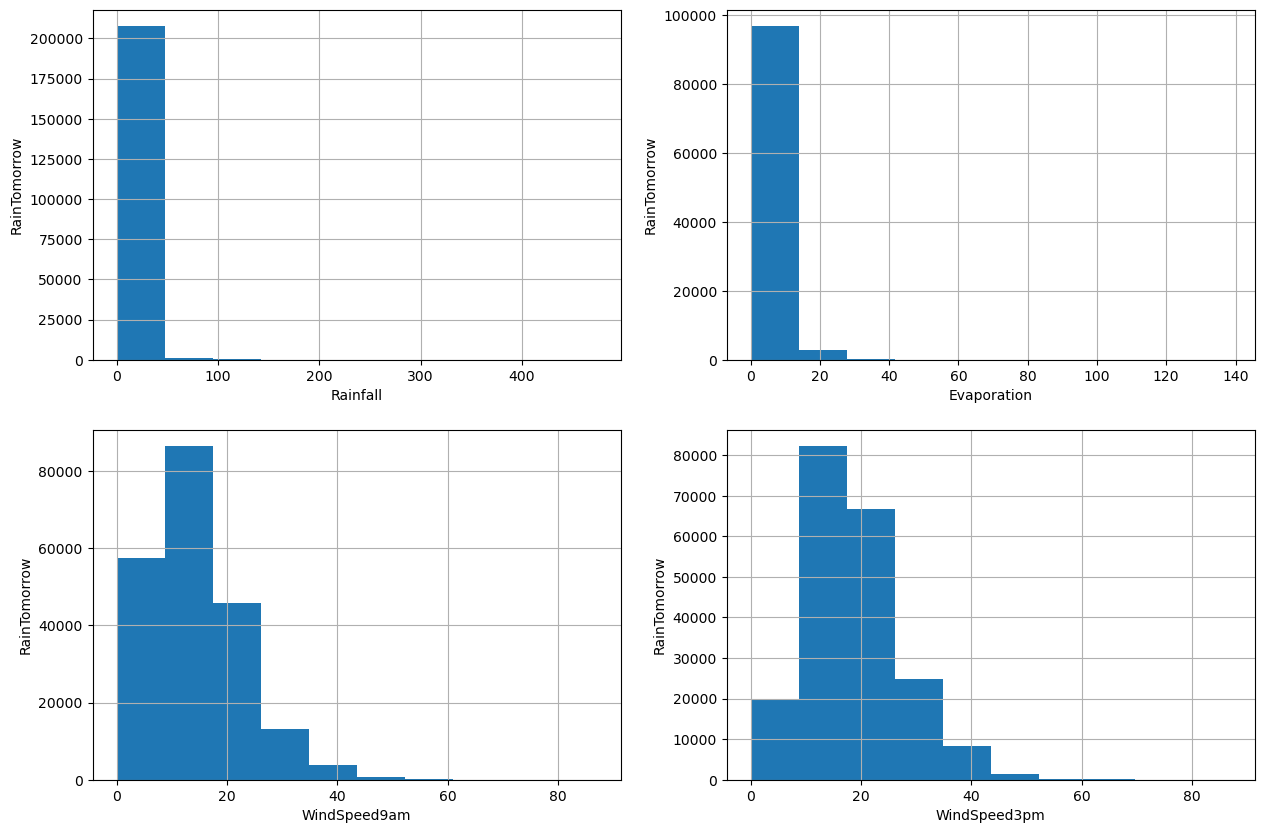

In [348]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = data.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = data.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 4)
fig = data.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [349]:
IQR = data.Rainfall.quantile(0.75) - data.Rainfall.quantile(0.25)
Lower_fence = data.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = data.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -1.7999999999999998 or > 2.4


In [350]:
# find outliers for Evaporation variable

IQR = data.Evaporation.quantile(0.75) - data.Evaporation.quantile(0.25)
Lower_fence = data.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = data.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


In [351]:
# find outliers for WindSpeed9am variable

IQR = data.WindSpeed9am.quantile(0.75) - data.WindSpeed9am.quantile(0.25)
Lower_fence = data.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = data.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


In [352]:
# find outliers for WindSpeed3pm variable

IQR = data.WindSpeed3pm.quantile(0.75) - data.WindSpeed3pm.quantile(0.25)
Lower_fence = data.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = data.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


In [353]:
correlation = data.corr()

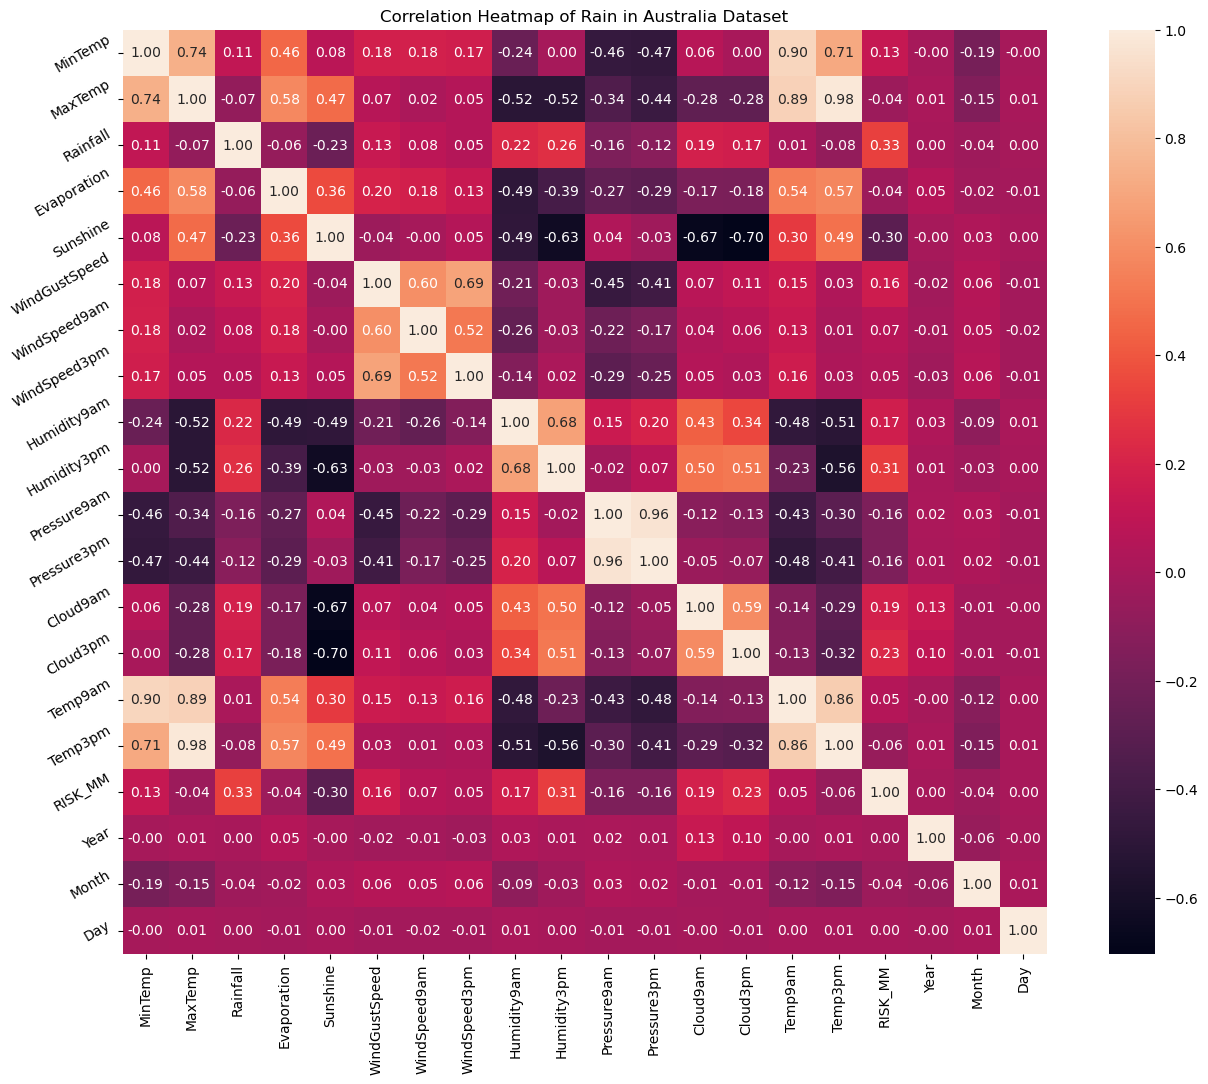

In [354]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [355]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

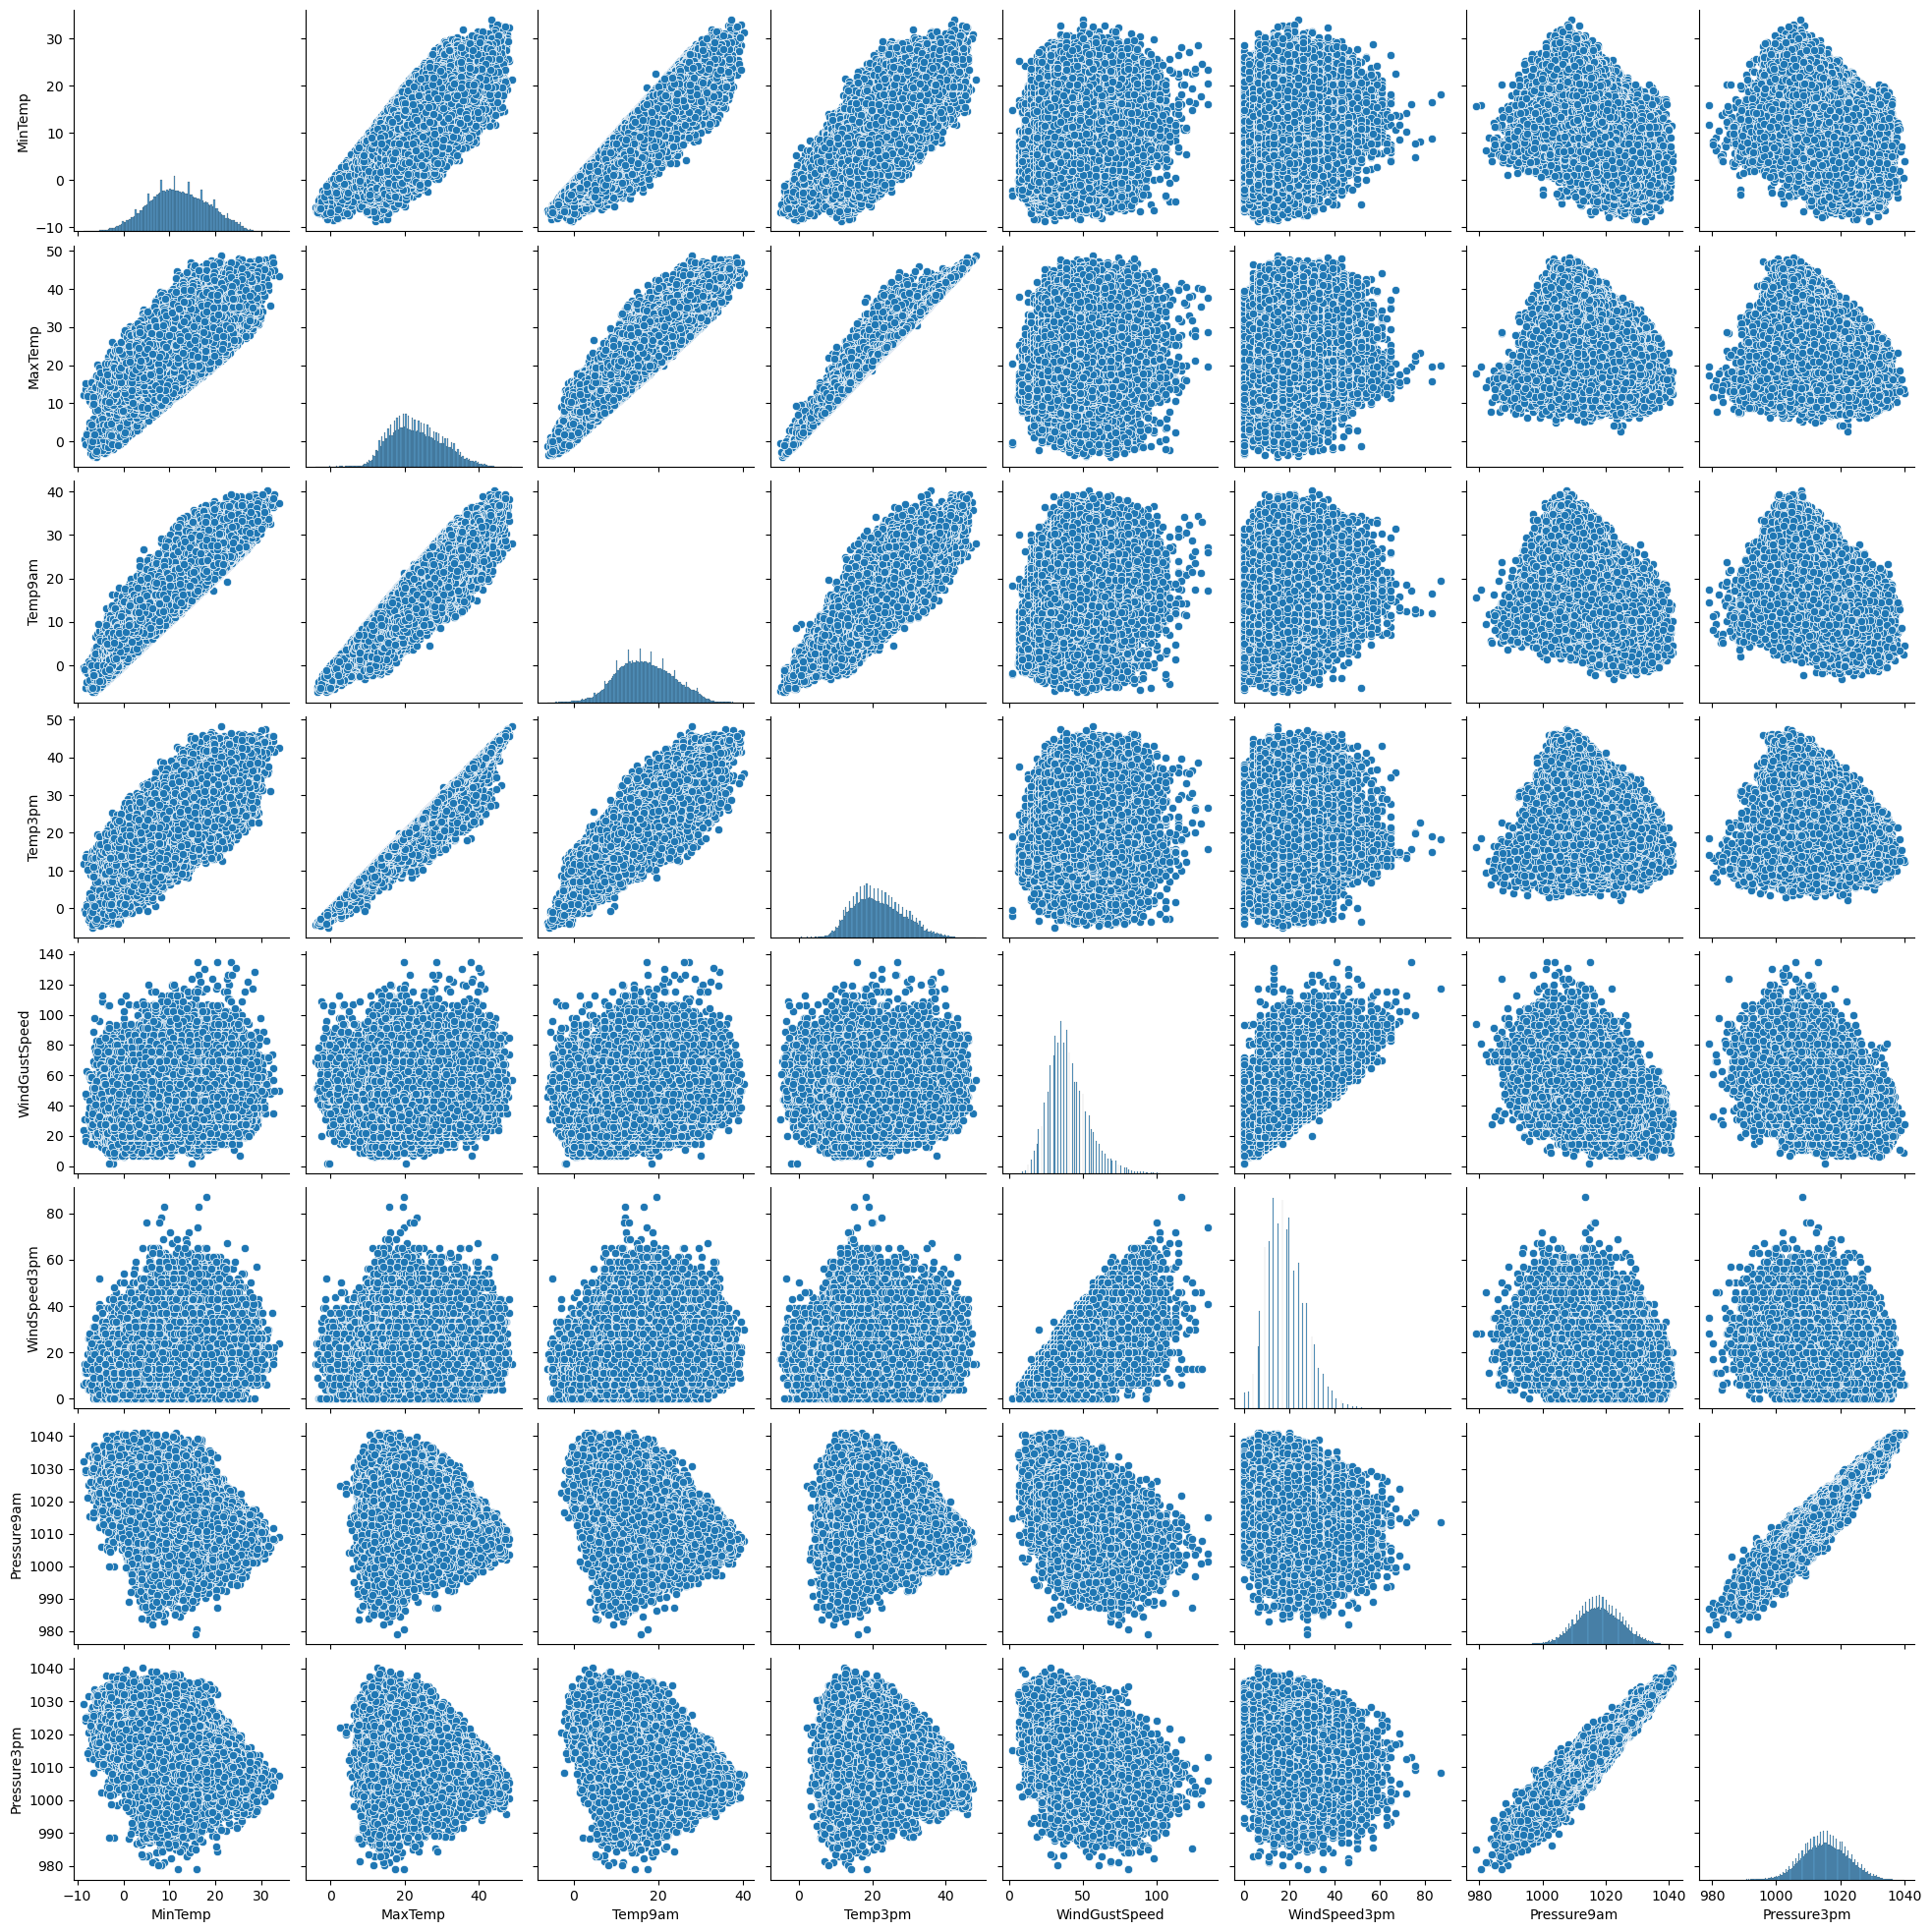

In [356]:
sns.pairplot(data[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

#### As we can see that there is a high multicolinearity between (Temp3pm, Temp9am) and (Pressure3pm,Pressure9am), we shall be taking the average values

In [357]:
data['Temp'] = (data['Temp3pm']+data['Temp9am'])/2.0
data.drop(['Temp3pm','Temp9am'], axis=1, inplace=True)

In [358]:
data['Pressure'] = (data['Pressure3pm']+data['Pressure9am'])/2.0
data.drop(['Pressure3pm','Pressure9am'], axis=1, inplace=True)

### Splitting the data into training data and testing data

In [359]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size=0.3, random_state=40)

In [360]:
# check the shape of X_train and X_test

X_train.shape,X_test.shape

((147547, 23), (63235, 23))

In [361]:
# check data types in X_train

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Cloud9am         float64
Cloud3pm         float64
RainToday         object
RISK_MM          float64
Year               int64
Month              int64
Day                int64
Temp             float64
Pressure         float64
dtype: object

In [362]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [363]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Cloud9am',
 'Cloud3pm',
 'RISK_MM',
 'Year',
 'Month',
 'Day',
 'Temp',
 'Pressure']

### Checking for missing values and imputing the same

In [364]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp            784
MaxTemp            518
Rainfall          1413
Evaporation      77678
Sunshine         83931
WindGustSpeed    10125
WindSpeed9am      2398
WindSpeed3pm      4891
Humidity9am       1659
Humidity3pm       4511
Cloud9am         62231
Cloud3pm         66313
RISK_MM              0
Year                 0
Month                0
Day                  0
Temp              4140
Pressure         16075
dtype: int64

In [365]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp            339
MaxTemp            210
Rainfall           597
Evaporation      33304
Sunshine         36036
WindGustSpeed     4318
WindSpeed9am      1053
WindSpeed3pm      2079
Humidity9am        734
Humidity3pm       1901
Cloud9am         26662
Cloud3pm         28292
RISK_MM              0
Year                 0
Month                0
Day                  0
Temp              1722
Pressure          6760
dtype: int64

In [366]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0053
MaxTemp 0.0035
Rainfall 0.0096
Evaporation 0.5265
Sunshine 0.5688
WindGustSpeed 0.0686
WindSpeed9am 0.0163
WindSpeed3pm 0.0331
Humidity9am 0.0112
Humidity3pm 0.0306
Cloud9am 0.4218
Cloud3pm 0.4494
Temp 0.0281
Pressure 0.1089


In [367]:
# impute missing values in X_train, X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)  

In [368]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Cloud9am         0
Cloud3pm         0
RISK_MM          0
Year             0
Month            0
Day              0
Temp             0
Pressure         0
dtype: int64

In [369]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Cloud9am         0
Cloud3pm         0
RISK_MM          0
Year             0
Month            0
Day              0
Temp             0
Pressure         0
dtype: int64

In [370]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.069056
WindDir9am     0.076166
WindDir3pm     0.040163
RainToday      0.009577
dtype: float64

In [371]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.06905596182911208
WindDir9am 0.07616556080435387
WindDir3pm 0.040163473333920716
RainToday 0.009576609487146469


In [372]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [373]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [374]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [375]:
# check missing values in X_train

X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Cloud9am         0
Cloud3pm         0
RainToday        0
RISK_MM          0
Year             0
Month            0
Day              0
Temp             0
Pressure         0
dtype: int64

In [376]:
# check missing values in X_test

X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Cloud9am         0
Cloud3pm         0
RainToday        0
RISK_MM          0
Year             0
Month            0
Day              0
Temp             0
Pressure         0
dtype: int64

In [377]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [378]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [379]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [380]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [381]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [382]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RISK_MM,Year,Month,Day,Temp,Pressure
count,147547.000000,147547.000000,147547.000000,147547.000000,147547.000000,147547.000000,147547.000000,147547.000000,147547.000000,147547.000000,147547.000000,147547.000000,147547.000000,147547.000000,147547.000000,147547.000000,147547.000000,147547.000000
mean,12.014085,23.151783,0.666284,5.094333,8.127005,39.898581,13.968966,18.536473,68.952246,51.323741,5.213905,4.804225,2.320240,2015.271012,6.492670,15.715752,19.219375,1016.553069
std,6.410600,7.114444,1.178268,2.557688,2.509624,13.088508,8.789431,8.586520,19.400489,20.740520,2.300957,2.051482,8.462251,4.126766,3.402317,8.797443,6.423692,6.578256
min,-8.700000,-4.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,1.000000,1.000000,-5.500000,982.050000
25%,7.400000,17.900000,0.000000,4.800000,8.500000,31.000000,7.000000,13.000000,57.000000,37.000000,4.000000,5.000000,0.000000,2012.000000,4.000000,8.000000,14.500000,1012.450000
50%,11.800000,22.500000,0.000000,4.800000,8.500000,39.000000,13.000000,17.000000,70.000000,52.000000,6.000000,5.000000,0.000000,2015.000000,7.000000,16.000000,18.850000,1016.500000
75%,16.600000,28.100000,0.600000,4.800000,8.500000,46.000000,19.000000,24.000000,83.000000,65.000000,6.000000,6.000000,0.600000,2019.000000,9.000000,23.000000,23.650000,1020.650000
max,32.800000,48.200000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,9.000000,9.000000,371.000000,2022.000000,12.000000,31.000000,42.900000,1040.600000


In [383]:
X_train[categorical]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
142824,Townsville,E,SE,E,No
14927,CoffsHarbour,NNE,N,NE,No
100053,Melbourne,NNE,NE,NNW,No
93676,Sale,W,N,SE,No
202867,AliceSprings,SE,NNW,SSW,Yes
...,...,...,...,...,...
57908,WaggaWagga,W,N,WSW,No
95338,MelbourneAirport,SE,ESE,SE,No
31350,NorfolkIsland,SW,SW,S,No
115858,Portland,WSW,W,WSW,Yes


In [384]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(data[numerical])

X_train[numerical] = scaler.transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

In [385]:
X_train[numerical]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RISK_MM,Year,Month,Day,Temp,Pressure
142824,0.549296,0.596226,0.000000,0.034607,0.586207,0.473684,0.252874,0.402299,0.46,0.48,0.222222,0.888889,0.000000,0.866667,0.636364,0.933333,0.625000,0.668858
14927,0.629108,0.716981,0.000000,0.047585,0.917241,0.458647,0.229885,0.528736,0.53,0.63,0.000000,0.000000,0.000000,0.400000,0.000000,0.233333,0.677686,0.475760
100053,0.582160,0.800000,0.000000,0.054795,0.848276,0.390977,0.103448,0.252874,0.68,0.16,0.000000,0.111111,0.000000,0.133333,1.000000,0.966667,0.696281,0.635990
93676,0.537559,0.647170,0.000000,0.034607,0.586207,0.278195,0.149425,0.195402,0.66,0.46,0.666667,0.555556,0.000000,0.800000,0.000000,0.333333,0.595041,0.603944
202867,0.725352,0.775472,0.003797,0.105263,0.234483,0.375940,0.252874,0.275862,0.35,0.28,0.333333,0.777778,0.000000,0.266667,1.000000,0.666667,0.792355,0.437962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57908,0.352113,0.520755,0.000000,0.034607,0.586207,0.278195,0.000000,0.218391,0.89,0.46,0.666667,0.555556,0.000000,0.933333,0.181818,0.933333,0.462810,0.672966
95338,0.422535,0.481132,0.000000,0.040375,0.848276,0.443609,0.356322,0.298851,0.55,0.40,0.111111,0.111111,0.000000,0.133333,1.000000,0.000000,0.480372,0.677075
31350,0.596244,0.458491,0.000000,0.057678,0.689655,0.390977,0.321839,0.298851,0.63,0.58,0.333333,0.777778,0.000000,0.133333,0.818182,0.866667,0.484504,0.649959
115858,0.399061,0.341509,0.006751,0.034607,0.586207,0.375940,0.229885,0.252874,0.80,0.94,0.777778,0.888889,0.013502,0.933333,0.545455,0.566667,0.331612,0.587510


In [386]:
from sklearn.preprocessing import OneHotEncoder

In [388]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(data[categorical])

In [389]:
encoded_cols = list(encoder.get_feature_names(categorical))

In [390]:
X_train[encoded_cols] = encoder.transform(X_train[categorical])
X_test[encoded_cols] = encoder.transform(X_test[categorical])

In [391]:
X_train[encoded_cols]

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
142824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
100053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
93676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202867,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
95338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
31350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
115858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [392]:
X_training = X_train[numerical + encoded_cols]
X_test = X_test[numerical + encoded_cols]

In [393]:
X_training['RISK_MM']

142824    0.000000
14927     0.000000
100053    0.000000
93676     0.000000
202867    0.000000
            ...   
57908     0.000000
95338     0.000000
31350     0.000000
115858    0.013502
146315    0.007595
Name: RISK_MM, Length: 147547, dtype: float64

In [394]:
y_train = X_training['RISK_MM']
X_train = X_training.drop(columns='RISK_MM', axis=1)

In [395]:
y_test = X_test['RISK_MM']
X_test = X_test.drop(columns='RISK_MM', axis=1)

In [396]:
y_train.shape

(147547,)

In [397]:
X_train.shape

(147547, 120)

In [398]:
y_test.dtype

dtype('float64')

In [399]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan', 'RainToday_No',
       'RainToday_Yes', 'RainToday_nan'],
      dtype='object', length=120)

In [400]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [401]:
model_accuracy = []
mse = []
for i in range(1, 30):
    reg = DecisionTreeRegressor(max_depth= i, random_state=40)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse.append(mean_squared_error(y_pred, y_test))
    model_accuracy.append(reg.score(X_train, y_train))
    print(f"Model accuracy: {reg.score(X_train, y_train)}, MSE: {mean_squared_error(y_pred, y_test)} ")

Model accuracy: 0.1265594881621046, MSE: 0.00029585818121344683 
Model accuracy: 0.17673472970944915, MSE: 0.00027771710828806794 
Model accuracy: 0.20893491114526752, MSE: 0.00026748532267202433 
Model accuracy: 0.23871436118628586, MSE: 0.00025840586090415565 
Model accuracy: 0.26822403118671123, MSE: 0.00025788942709158207 
Model accuracy: 0.31512576444665286, MSE: 0.0002610261520737397 
Model accuracy: 0.35508563836502305, MSE: 0.0002611929359935026 
Model accuracy: 0.4113261952249131, MSE: 0.0002694623315084856 
Model accuracy: 0.47408713418206305, MSE: 0.00027908119123232786 
Model accuracy: 0.5381994151825105, MSE: 0.0003076786920462751 
Model accuracy: 0.6022466868556723, MSE: 0.000317667447509972 
Model accuracy: 0.6631675554299279, MSE: 0.00033001927863969977 
Model accuracy: 0.7140883399167033, MSE: 0.00035425789296435065 
Model accuracy: 0.7628805013604039, MSE: 0.0003745021576249881 
Model accuracy: 0.8009150602865756, MSE: 0.00038110763776556437 
Model accuracy: 0.8370318